In [10]:
"""Volume 2: Non-negative Matrix Factorization."""

import numpy as np
from numpy import linalg as la
import cvxpy as cp
from matplotlib import pyplot as plt
import os
from imageio import imread
import warnings
warnings.filterwarnings("ignore")
print('here')
from sklearn.decomposition import NMF
print('now here')
from sklearn.metrics import mean_squared_error as mse
print('done')

here
now here
done


In [11]:
#Problems 1-2
class NMFRecommender:

    def __init__(self,random_state=15,rank=3,maxiter=200,tol=1e-3):
        """The parameter values for the algorithm"""

        self.random_state = random_state
        self.tol = tol
        self.rank = rank
        self.maxiter = maxiter
        self.tol = tol
        
    def initialize_matrices(self,m,n):
        """randomly initialize the W and H matrices,"""
        k = self.rank
        np.random.seed(self.random_state)
        self.W = np.random.random((m,k))
        self.H = np.random.random((k,n))
        return self.W, self.H
        
    def fit(self,V):
        """Fits W and H weight matrices using CVXPY"""
        assert type(V) == np.ndarray, "V must be a NumPy matrix"
        m,n = V.shape
        W, H = self.initialize_matrices(m, n)

#         W = cp.Variable((self.W.shape), nonneg = True)
#         H = cp.Variable((self.H.shape), nonneg = True)
#         W.value = self.W
#         H.value = self.
        
        for _ in range(self.maxiter):
            W = cp.Variable((self.W.shape), nonneg = True)
            objective1 = cp.Minimize(cp.norm(V - W@H,p = 'fro'))
            prob1 = cp.Problem(objective1)
            prob1.solve()
            W = W.value
            
            H = cp.Variable((self.H.shape), nonneg = True)
            objective2 = cp.Minimize(cp.norm(V - W@H,p = 'fro'))
            prob2 = cp.Problem(objective2)
            prob2.solve()
            H = H.value
        
            
#             H = cp.Variable((self.H.shape), nonneg = True)
            
            if la.norm(V-self.W@self.H, 'fro') <= self.tol:
                print('Converged')
                break
        self.W = W
        self.H = H
#         return self.W, self.H
    
    def reconstruct(self):
        """Reconstruct V matrix for comparison against the original V"""
        prod = self.W @ self.H
        return prod

In [4]:
# la.matrix_rank(V)

In [12]:
def prob3():
    """Run NMF recommender on the grocery store example"""
    V = np.array(
        [
        [0,1,0,1,2,2],
        [2,3,1,1,2,2],
        [1,1,1,0,1,1],
        [0,2,3,4,1,1],
        [0,0,0,0,1,0]
        ]
    )
    nmf = NMFRecommender(rank=2)
    nmf.fit(V)
    x = nmf.H[0] - nmf.H[1]
    print(nmf.W,nmf.H)
#     print(nmf.reconstruct)
#     print(nmf.W @ nmf.H)
    return len(x[x<=0]) 

In [13]:
prob3()

[[4.32480191e-01 1.55954416e+00]
 [7.28906415e-01 2.67373283e+00]
 [2.59466489e-01 1.23238130e+00]
 [2.77259088e+00 7.64369539e-08]
 [2.08546906e-09 3.68889128e-01]] [[4.28503903e-08 7.25973906e-01 1.07543057e+00 1.44598707e+00
  3.52852850e-01 3.65398494e-01]
 [5.85611950e-01 7.72213331e-01 6.59496409e-02 5.89472429e-09
  8.03616848e-01 7.67499335e-01]]


4

In [14]:

#get data
def get_faces(path="./faces94"):
    """Traverse the specified directory to obtain one image per subdirectory.
    Flatten and convert each image to grayscale.

    Parameters:
        path (str): The directory containing the dataset of images.

    Returns:
        ((mn,k) ndarray) An array containing one column vector per
            subdirectory. k is the number of people, and each original
            image is mxn.
    """
    # Traverse the directory and get one image per subdirectory.
    faces = []
    for (dirpath, dirnames, filenames) in os.walk(path):
        for fname in filenames:
            if fname[-3:]=="jpg":       # Only get jpg images.
                # Load the image, convert it to grayscale,
                # and flatten it into a vector.
                faces.append(np.ravel(imread(dirpath+"/"+fname, as_gray=True)))
                break
    # Put all the face vectors column-wise into a matrix.
    return np.transpose(faces)

def show(image, m=200, n=180, plt_show=False):
    """Plot the flattened grayscale 'image' of width 'w' and height 'h'.

    Parameters:
        image ((mn,) ndarray): A flattened image.
        m (int): The original number of rows in the image.
        n (int): The original number of columns in the image.
        plt_show (bool): if True, call plt.show() at the end
    """
    #scale image
    image = image / 255
    #reshape image
    image = np.reshape(image,(m,n))
    #show image
    plt.imshow(image,cmap = "gray")
    
    if plt_show:
        plt.show()


In [15]:
def prob4():
    """
        Gridsearch over rank, alpha and l1_ratio values to reconstruct 
        image using NMF. Plot all reconstructed images.
    """
    faces = get_faces()
    alph = [0,.2,.5]
    l1 = [0,10**-5,10]
    Wmat = []
    Hmat = []
    for i in alph:
        for j in l1:
            model = NMF(n_components = 75, alpha = i, l1_ratio = j, max_iter = 1000)
            W = model.fit_transform(faces)
            H = model.components_
            plt.title('Face 2. Alpha = '+str(i)+', l1 = '+str(j))
            plt.axis('off')
            show((W@H).T[2], plt_show = True)

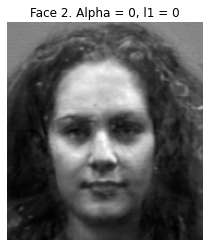

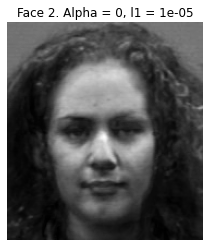

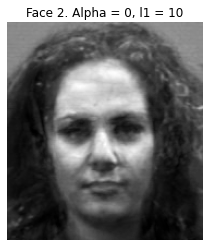

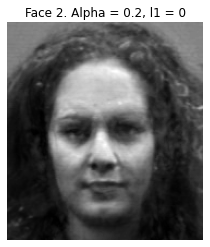

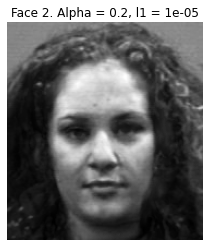

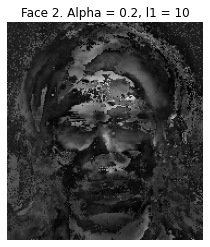

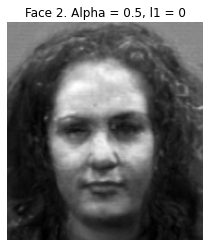

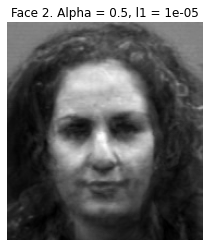

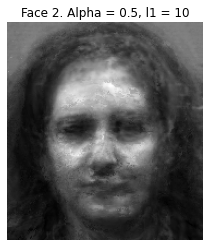

In [16]:
prob4()

In [22]:
def prob5():
    '''
        find the 10 basis faces with the largest coefficients 
        corresponding to the the second and twelfth face in the dataset. 
        Plot these basis faces along with the original image using 
        subplots
    '''
    faces = get_faces()
    model = NMF(n_components = 75, alpha = .5, l1_ratio = 1e-05, max_iter = 1000)
    W = model.fit_transform(faces)
    H = model.components_
    return W, H

In [23]:
W, H = prob5()
faces = get_faces()

Second Face


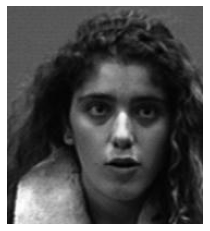

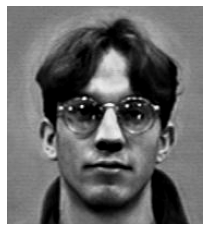

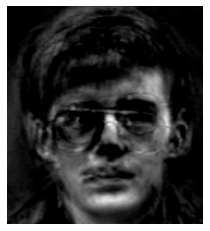

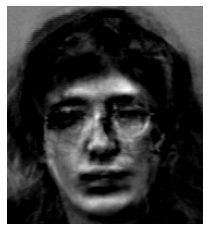

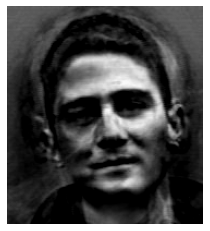

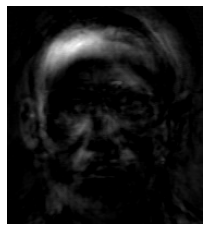

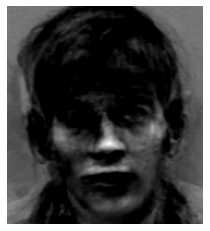

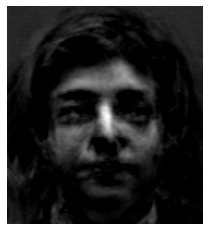

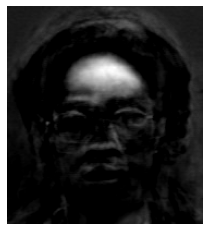

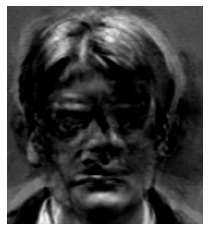

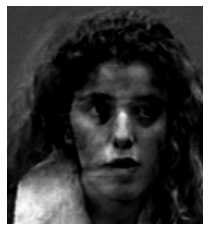

Twelfth Face


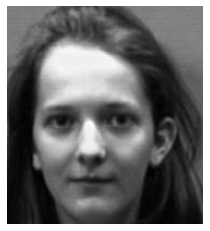

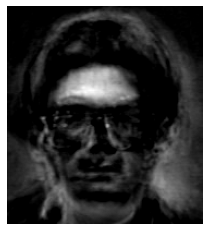

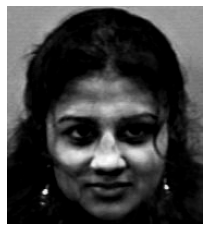

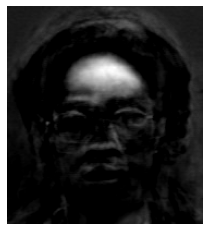

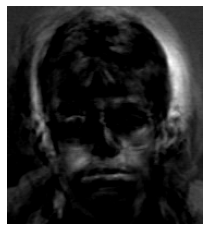

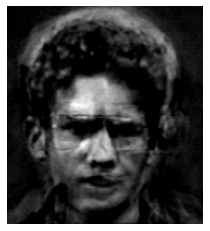

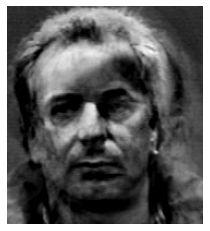

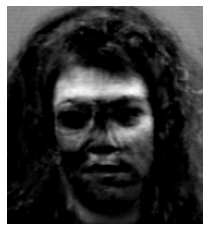

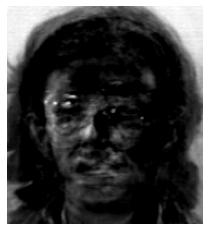

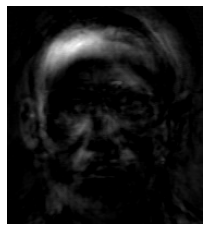

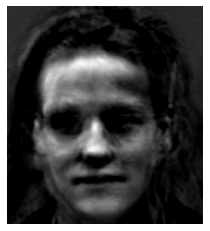

In [24]:
print('Second Face')
face1 = np.argsort(H[:,1])[-10:]
plt.axis('off')
show(faces[:,1], plt_show = True)
for i in face1:
    plt.axis('off')
    show(W[:,i], plt_show = True)

print('Twelfth Face')
face1 = np.argsort(H[:,11])[-10:]
plt.axis('off')
show(faces[:,11], plt_show = True)
for i in face1:
    plt.axis('off')
    show(W[:,i], plt_show = True)

In [19]:
def prob4():
    """
        Gridsearch over rank, alpha and l1_ratio values to reconstruct
        image using NMF. Plot all reconstructed images.
    """
    print("FF")
    # Initialize
    dataset = get_faces()
    print("TT")
    # Grid search
    for a in [0,0.2,0.5]:
        for l in [0,1e-5,10]:
            model = NMF(n_components = 75, max_iter=1000, alpha = a,l1_ratio = l)
            print("Here")
            W = model.fit_transform(dataset)
            print("A")
            H = model.components_
            print("B")
            # Compute product for 3rd image
            V_tilde = W @ H[:,2]
            # Plot
            show(V_tilde)
            plt.title("Third Face w/ alpha=" + str(a) + "and l1=" + str(l))
            plt.axis('off')
            show(V_tilde, plt_show = True)



FF
TT
Here
A
B


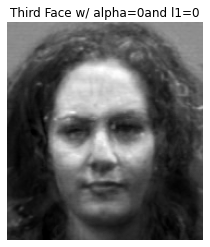

Here


KeyboardInterrupt: 

In [21]:
prob4()